### TELETIN ALEXANDRA-IONELA
### PROIECT AMAZON-EXAMEN 
### DATA: 17.01.2020. 
### GRUPA M131

## Subject 1: MNIST Clustering

1. Download the MNIST data set using the code below.
2. Ignoring the label normally associated to the dataset, construct a clustering of the data. Your clustering should maximize the v-score measure relative to true data labels (
    Paper describing the measure: https://www.aclweb.org/anthology/D07-1043.pdf
    Implementation available in python: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score
). Note that failing to ignore the labels during training will void your score for this subject.

In [1]:

import time
import matplotlib.pyplot as plt
import numpy as np
import os
np.random.seed(42)

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


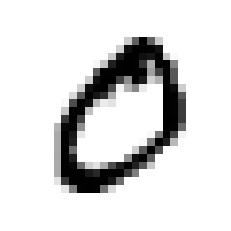

In [2]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary
some_digit_image = X[1].reshape(28, 28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()


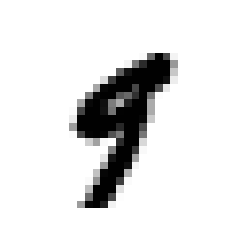

In [3]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [5]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

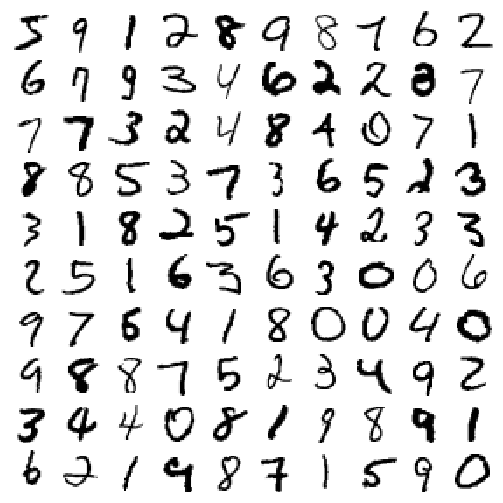

In [6]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [7]:
y[36000]


'9'

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train = y_train.astype(np.int8)

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


# Binary classifier


In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)


C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])


array([False])

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.964 , 0.9579, 0.9571])

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.964


C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9579
0.9571


C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [16]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [17]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90745, 0.9125 ])

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54058,   521],
       [ 1899,  3522]], dtype=int64)

In [20]:
y_train_perfect_predictions = y_train_5


In [21]:
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8711352955725946

In [23]:
recall_score(y_train_5, y_train_pred)


0.6496956281128943

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7442941673710904

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-400042.39513131])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [27]:
y_some_digit_pred


array([False])

In [28]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [30]:
y_scores.shape


(60000,)

In [31]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

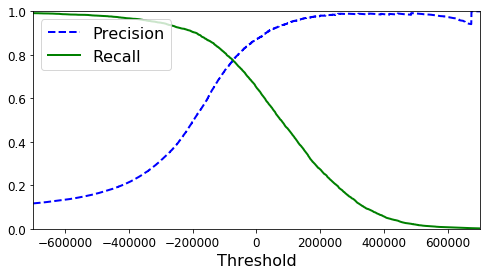

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [34]:
(y_train_pred == (y_scores > 0)).all()


True

In [35]:
y_train_pred_90 = (y_scores > 70000)


In [36]:
precision_score(y_train_5, y_train_pred_90)


0.9309882747068676

In [37]:
recall_score(y_train_5, y_train_pred_90)


0.5126360450101457

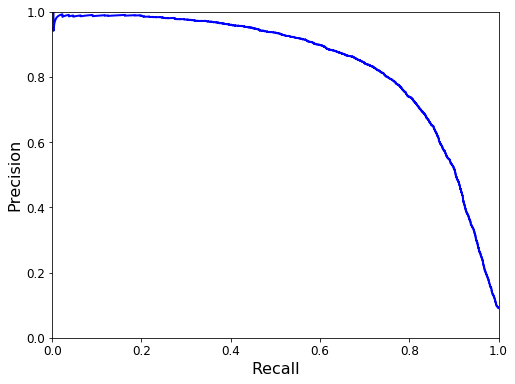

In [38]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

# ROC curves


In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

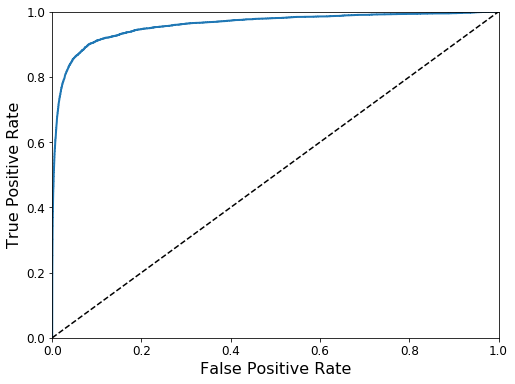

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [41]:

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9598058535696421

In [42]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

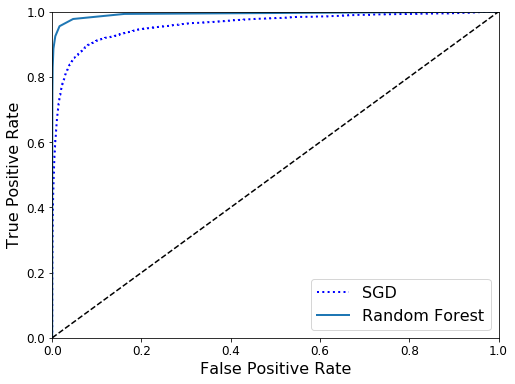

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [45]:
roc_auc_score(y_train_5, y_scores_forest)


0.9928250745111685

In [46]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9870386643233744

In [47]:
recall_score(y_train_5, y_train_pred_forest)


0.8288138719793396

# Multiclass classification


In [48]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([9], dtype=int8)

In [49]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-780634.17445014, -367988.10902669, -857510.2219226 ,
        -109587.17435534,   -6978.239532  , -120352.38122307,
        -785831.32198027, -377771.38059503, -198143.6559996 ,
         107815.22648992]])

In [50]:
np.argmax(some_digit_scores)


9

In [51]:
sgd_clf.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [52]:
sgd_clf.classes_[5]

5

In [53]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\s

array([4], dtype=int8)

In [54]:
len(ovo_clf.estimators_)


45

In [55]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([9], dtype=int8)

In [56]:
forest_clf.predict_proba([some_digit])


array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9]])

In [57]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.87217556, 0.87109355, 0.83892584])

In [58]:
#array([0.84063187, 0.84899245, 0.86652998])


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91106779, 0.9080454 , 0.90888633])

In [60]:
#array([0.91011798, 0.90874544, 0.906636  ])


In [61]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5741,    2,   22,   11,   11,   40,   48,    7,   39,    2],
       [   2, 6457,   49,   28,    6,   45,    9,   11,  125,   10],
       [  55,   35, 5323,   98,   79,   24,  104,   62,  162,   16],
       [  47,   40,  140, 5314,    3,  254,   34,   57,  141,  101],
       [  19,   25,   41,    9, 5360,   10,   56,   36,   77,  209],
       [  76,   39,   30,  174,   76, 4610,  110,   29,  168,  109],
       [  36,   20,   42,    2,   39,   89, 5632,    7,   50,    1],
       [  23,   19,   61,   26,   54,   11,    7, 5826,   14,  224],
       [  56,  149,   78,  143,   12,  163,   56,   27, 5012,  155],
       [  46,   30,   26,   83,  160,   35,    3,  207,   74, 5285]],
      dtype=int64)

In [62]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

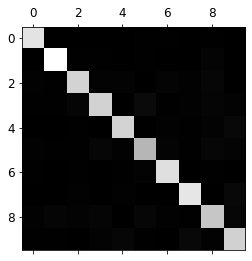

In [63]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [64]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

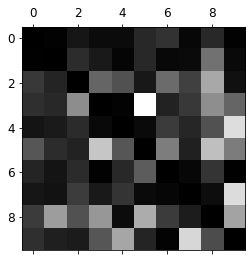

In [65]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

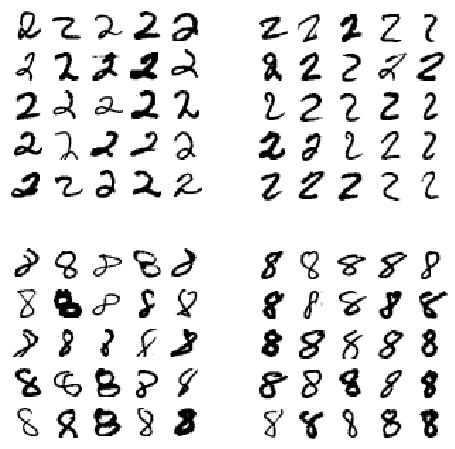

In [66]:
cl_a, cl_b = 2,8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

# Multilabel classification


In [67]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
knn_clf.predict([some_digit])


array([[ True,  True]])

In [69]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9768224011622285

# Multioutput classification


In [70]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 10, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

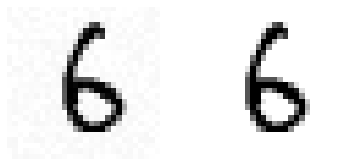

In [71]:
import matplotlib
some_index = 3000
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

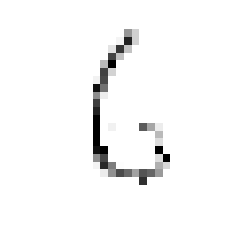

In [72]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

## Subject 2: Text NewsGroup Classification
1. Download the newsgroups data set using the code below. 
2. Construct a text classifier that predicts the target variable (newsgroups.target) from the input data (newsgroups.data).
3. We will evaluate your classifier against a hold-out data set, so be sure to construct a classification function that can receive a single string.

In [73]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='train')

In [74]:

newsgroups.data[:4] 

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [75]:
newsgroups.target_names #prints all the categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [76]:
print("\n".join(newsgroups.data[0].split("\n")[:3])) 
#prints first line of the first data file


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [77]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(newsgroups.data)
X_train_counts.shape

(11314, 130107)

In [78]:
# TF-IDF
#TF-IDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [79]:
# Training Naive Bayes (NB) classifier on training data.
#În învățarea automată, clasificatorii bayesieni naivi reprezintă o familie de „clasificatori probabilistici” simpli, bazați pe aplicarea teoremei lui Bayes cu ipoteze puternice (naive) de independență între descriptori.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, newsgroups.target)

In [80]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(newsgroups.data, newsgroups.target)

In [81]:
# Performance of NB Classifier
import numpy as np
newsgroups_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(newsgroups.data)
np.mean(predicted == newsgroups.target)

0.9326498143892522

In [82]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(newsgroups.data, newsgroups.target)
predicted_svm = text_clf_svm.predict(newsgroups.data)
np.mean(predicted_svm == newsgroups.target)

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9671203818278239

In [83]:
# Grid Search
# Here, we are creating a list of parameters for which we would like to do performance tuning. 
# All the parameters name start with the classifier name. 
# E.g. vect__ngram_range; here we are telling to use unigram and bigrams and choose the one which is optimal.

from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

In [84]:
# Next, we create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(newsgroups.data, newsgroups.target)

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [85]:
# To see the best mean score and the params

gs_clf.best_score_
gs_clf.best_params_


{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [86]:
# Similarly doing grid search for SVM
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(newsgroups.data,newsgroups .target)


gs_clf_svm.best_score_
gs_clf_svm.best_params_

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [87]:
# NLTK
# Removing stop words
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

In [88]:
# Stemming Code

import nltk
nltk.download()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB(fit_prior=False))])

text_mnb_stemmed = text_mnb_stemmed.fit(newsgroups.data, newsgroups.target)

predicted_mnb_stemmed = text_mnb_stemmed.predict(newsgroups.data)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [ ]:
np.mean(predicted_mnb_stemmed == newsgroups.target)

# Another solution for the second exercise

In [91]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np
newsgroups = fetch_20newsgroups( subset='train', categories=categories, shuffle=True, random_state=42)

In [92]:
categories = ['alt.atheism', 'soc.religion.christian',
            'comp.graphics', 'sci.med']

In [93]:
newsgroups.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [94]:
# Fișierele în sine sunt încărcate în memorie în atributul de date. Pentru referință, numele fișierelor sunt disponibile și:

In [95]:
len(newsgroups.data)

2257

In [96]:
len(newsgroups.filenames)

2257

Să imprimăm primele rânduri ale primului fișier încărcat:

In [97]:
print ("\n".join(newsgroups.data[0].split("\n")[:2]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?


In [98]:
print(newsgroups.target_names[newsgroups.target[0]])

comp.graphics


Algoritmii de învățare supervizați vor necesita o etichetă de categorie pentru fiecare document din setul de instruire. În acest caz, categoria este numele grupului de știri, care se întâmplă să fie și numele folderului care conține documentele individuale.

In [99]:
newsgroups.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [100]:
for t in newsgroups.target[:10]:
    print(newsgroups.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


# Extracting features from text files

## Bags of words

### Tokenizing text with scikit-lear
Pentru a construi o astfel de reprezentare vom proceda astfel:

tokenize șiruri și dați un ID întreg pentru fiecare token posibil, de exemplu, folosind spații albe și punctuație ca separatoare token.
numărați aparițiile de jetoane din fiecare document.
normalizați și cântăriți cu jetoane de importanță care scad în majoritatea eșantioanelor / documentelor

In [101]:
 from sklearn.feature_extraction.text import CountVectorizer


In [102]:
analyze= CountVectorizer().build_analyzer()
text="UN PARAGAF pentru test a !"
analyze(text)

['un', 'paragaf', 'pentru', 'test']

Notă că punctuația și cuvintele cu o singură literă au fost eliminate automat.

In [103]:
count_vect = CountVectorizer(stop_words='english')

In [104]:
X_train_counts = count_vect.fit_transform(newsgroups.data)

In [105]:
X_train_counts.shape

(2257, 35482)

In [106]:
count_vect.vocabulary_.get(u'algorithm')

4683

Valoarea indexului unui cuvânt din vocabular este legată de frecvența acestuia în întregul corpus de instruire.

#  From occurrence counts to normalized frequencies

In [107]:
from sklearn.feature_extraction.text import TfidfTransformer

In [108]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)

In [109]:
X_train_tf = tf_transformer.transform(X_train_counts)

In [110]:
X_train_tf.shape

(2257, 35482)

In [111]:
tfidf_transformer = TfidfTransformer()

In [112]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [113]:
X_train_tfidf.shape

(2257, 35482)

## Training a classifier 
Să începem cu un clasificator naiv Bayes

In [114]:
from sklearn.naive_bayes import MultinomialNB

In [115]:
clf = MultinomialNB().fit(X_train_tfidf, newsgroups.target)

Pentru a încerca să prezicem rezultatul unui nou document, trebuie să extragem funcțiile folosind aproape același lanț de extragere a funcțiilor ca înainte.

In [116]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']

In [117]:
 X_new_counts = count_vect.transform(docs_new)

In [118]:
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [119]:
predicted = clf.predict(X_new_tfidf)

In [120]:
for doc, category in zip(docs_new, predicted):
    print ('%r => %s' % (doc, newsgroups.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


# Building a pipeline
In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class that behaves like a compound classifier:

In [121]:
from sklearn.pipeline import Pipeline

In [122]:
textclf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
    ])

Numele vector, tf idf și clf (clasificator) sunt arbitrare. Vom vedea utilizarea lor în secțiunea de căutare a rețelei, mai jos. Acum putem antrena modelul cu o singură comandă:

In [123]:
_ = textclf.fit(newsgroups.data, newsgroups.target)

# Evaluation of the performance on the test set
Evaluarea exactității predictive a modelului este la fel ușoară:


In [124]:
import numpy as np

In [125]:
newsgroups_test = fetch_20newsgroups(
    subset='test', categories=categories,
    shuffle=True, random_state=42)
docs_test = newsgroups_test.data
predicted = textclf.predict(docs_test)
np.mean(predicted == newsgroups_test.target) 

0.8348868175765646

We achieved 83.4% accuracy. Let’s see if we can do better with a linear support vector machine (SVM), which is widely regarded as one of the best text classification algorithms (although it’s also a bit slower than naïve Bayes). We can change the learner by just plugging a different classifier object into our pipeline:

In [126]:
textclf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
         alpha=1e-3, max_iter=5)),
   ])
_ = textclf.fit(newsgroups.data, newsgroups.target)
predicted = textclf.predict(docs_test)
np.mean(predicted == newsgroups_test.target)  

C:\Users\Andra\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9094540612516645

pentru o analiză mai detaliată a performanței rezultatelor:

In [127]:
from sklearn import metrics

In [128]:
metrics.confusion_matrix(newsgroups_test.target, predicted)
np.array([[261,  10,  12,  36],
       [  5, 380,   2,   2],
       [  7,  33, 352,   4],
       [  7,   9,   4, 378]])

array([[261,  10,  12,  36],
       [  5, 380,   2,   2],
       [  7,  33, 352,   4],
       [  7,   9,   4, 378]])

In [129]:
from sklearn import metrics
print(metrics.classification_report(
    newsgroups_test.target, predicted,
     target_names=newsgroups_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.81      0.87       319
         comp.graphics       0.86      0.98      0.92       389
               sci.med       0.95      0.88      0.92       396
soc.religion.christian       0.90      0.95      0.92       398

              accuracy                           0.91      1502
             macro avg       0.92      0.90      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



# Parameter tuning using grid search
We’ve already encountered some parameters such as use_idf in the TfidfTransformer. Classifiers tend to have many parameters as well; e.g., MultinomialNB includes a smoothing parameter alpha and SGDClassifier has a penalty parameter alpha and configurable loss and penalty terms in the objective function (see the module documentation, or use the Python help function, to get a description of these).

Instead of tweaking the parameters of the various components of the chain, it is possible to run an exhaustive search of the best parameters on a grid of possible values. We try out all classifiers on either words or bigrams, with or without idf, and with a penalty parameter of either 100 or 1000 for the linear SVM:

In [130]:
from sklearn.model_selection import learning_curve, GridSearchCV


In [131]:
parameters = [{'union__tfidf__vect__model__ngram_range': ((1, 1), (1, 2), (1, 3), (1, 4)), 
            'clf__alpha': (1e-2, 1e-3, 1e-4, 1e-5), 
            'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'), 
            'clf__penalty': ('none', 'l2', 'l1', 'elasticnet'), 
            'clf__n_iter': (3, 4, 5, 6, 7, 8, 9, 10)}] 

Obviously, such an exhaustive search can be expensive. If we have multiple CPU cores at our disposal, we can tell the grid searcher to try these eight parameter combinations in parallel with the n_jobs parameter. If we give this parameter a value of -1, grid search will detect how many cores are installed and uses them all:

In [132]:
gsclf = GridSearchCV(textclf, parameters, n_jobs=1)

Let’s perform the search on a smaller subset of the training data to speed up the computation: